# Importing Libraries

In [151]:
!pip install streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/62/b1/44bd5f0eb1a6d9fa045db1e8bca77dc6751c12f7dacebf820ee708ea5acc/streamlit-1.47.0-py3-none-any.whl.metadata
  Obtaining dependency information for watchdog<7,>=2.1.5 from https://files.pythonhosted.org/packages/b5/e8/dbf020b4d98251a9860752a094d09a65e1b436ad181faf929983f697048f/watchdog-6.0.0-py3-none-manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
  Obtaining dependency information for pydeck<1,>=0.8.0b4 from https://files.pythonhosted.org/packages/ab/4c/b888e6cf58bd9db9c93f40d1c6be8283ff49d88919231afe93a6bcf61626/pydeck-0.9.1-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 34.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 47.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.6 MB/s eta 0:00:00


In [153]:
from tqdm import tqdm
import streamlit as st
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

import string
import re
from string import punctuation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.get_option("display.max_rows")

/kaggle/input/email-spam-classification-dataset/combined_data.csv


60

In [4]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

# Loading Dataset

In [6]:
MyData = pd.read_csv('/kaggle/input/email-spam-classification-dataset/combined_data.csv')

,label,text
60023,1,buy must have pills and save upto escapenumber...


In [7]:
# MyData.head()

,label,text
19879,1,oem means original equipment manufacturer so o...
49958,1,protect your account info make sure you never ...
28063,1,"dear sir ,\nfirst i must solicit your strictes..."
29176,0,"jason ,\nthere was a problem with the request ..."
69733,0,thanks very much for your comments . i too app...


In [9]:
MyData.shape

(83448, 2)

# Data Cleaning and EDA

In [11]:
MyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [15]:
MyData.nunique()

label        2
text     83446
dtype: int64

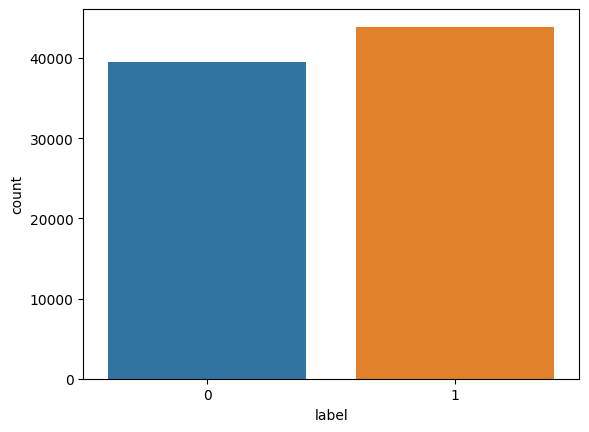

In [6]:
sns.countplot(x=df['label'])
plt.show()

In [21]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
list(punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [22]:
def clean_text(text):
    
    punc = list(punctuation) 
    stop = stopwords.words('english')
    bad_tokens = punc + stop
    
    lemma = WordNetLemmatizer()
    
    tokens = word_tokenize(text)
    
    word_tokens = [t for t in tokens if t.isalpha()]
    
    clean_tokens = [lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_tokens]
    
    return ' '.join(clean_tokens)

In [42]:
MyData['email'] = [clean_text(x) for x in tqdm(MyData['text'], desc="Processing emails")]

Processing emails: 100%|██████████| 83448/83448 [04:36<00:00, 301.56it/s]


# Model Building

In [44]:
pos = MyData[MyData['label'] == 1].sample(5000)
neg = MyData[MyData['label'] == 0].sample(5000)

# Concat pos and neg label
FinalData = pd.concat([pos,neg],axis=0)
FinalData.shape

(10000, 3)

In [109]:
X = FinalData['email']
y = FinalData['label']

In [50]:
MyVec = TfidfVectorizer()
X = MyVec.fit_transform(X).toarray()

In [60]:
X[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [111]:
X_train.shape

(9000,)

In [112]:
X_test.shape

(1000,)

**Logistic Regression**

In [128]:
MyVec = TfidfVectorizer(preprocessor=clean_text, max_features=1000)

MyLG = LogisticRegression( max_iter=1000 )

In [131]:
MyModel = Pipeline([
    ('vectorizer', MyVec),  # Applies Clean_text + TF-IDF
    ('classifier', MyLG)    # Your logistic regression
])

In [132]:
print("Training the pipeline...")
Model.fit(X_train, y_train)

Training the pipeline...


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=1000,
                                 preprocessor=<function clean_text at 0x7f2b71427910>)),
                ('classifier', LogisticRegression(max_iter=1000))])

In [148]:
y_pred = LoadedModel.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9640

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       500
           1       0.96      0.97      0.96       500

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



In [135]:
# Predict a new email
spam = ["WIN A FREE IPHONE! Click now!"]
real = ["Welcome Mohamed Your Task Is DOne, Thanks "]

In [145]:
prediction = LoadedModel.predict(real)

In [146]:
prediction

array([0])

In [147]:
print(f"\nPrediction: {'spam' if prediction[0] == 1 else 'ham'}")


Prediction: ham


### Saving 

In [142]:
joblib.dump(MyModel,"MyPipeLine.joblib")

['MyPipeLine.joblib']

### Loading 

In [144]:
LoadedModel= joblib.load('/kaggle/working/MyPipeLine.joblib')

In [83]:
SampleMail= MyData.sample()

# Thank U